In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 86.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:

from roboflow import Roboflow
rf = Roboflow(api_key="Bfnj2mXBcGMaAdCH49dm")
project = rf.workspace("university-g3h71").project("swimming-and-drowning-detection")
version = project.version(1)
dataset = version.download("yolov8")
print(f"Dataset downloaded to: {dataset.location}")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Swimming-and-Drowning-Detection-1 in yolov8:: 100%|██████████| 24742/24742 [00:03<00:00, 7010.44it/s]


Dataset downloaded to: /content/Swimming-and-Drowning-Detection-1


In [ ]:
import os

# Path to the downloaded dataset
dataset_path = "/content/Swimming-and-Drowning-Detection-1"

# Check if the required folders exist
required_folders = ["train", "valid", "test"]
for folder in required_folders:
    if not os.path.exists(os.path.join(dataset_path, folder)):
        print(f"Error: Folder '{folder}' not found in dataset.")
    else:
        print(f"Folder '{folder}' found. ✅")

# Check if data.yaml exists
if not os.path.exists(os.path.join(dataset_path, "data.yaml")):
    print("Error: 'data.yaml' file not found.")
else:
    print("'data.yaml' file found. ✅")

Folder 'train' found. ✅
Folder 'valid' found. ✅
Folder 'test' found. ✅
'data.yaml' file found. ✅


In [ ]:
!pip uninstall -y numpy torch ultralytics

In [ ]:
!pip install numpy==1.23.5 torch==2.0.1 ultralytics

In [ ]:
import numpy, torch
print(numpy.__version__)  # Should be 1.23.5
print(torch.__version__)  # Should be 2.0.1

In [4]:
!pip install ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.3/949.3 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
model.train(
    data="/content/Swimming-and-Drowning-Detection-1/data.yaml",
    epochs=20,
    imgsz=640,
    batch=16,
    device="0",
    project="/content/drive/MyDrive/YOLOv8_Training"  # Save to Google Drive
)

100%|██████████| 6.25M/6.25M [00:00<00:00, 201MB/s]


Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Swimming-and-Drowning-Detection-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=/content/drive/MyDrive/YOLOv8_Training, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sav

100%|██████████| 755k/755k [00:00<00:00, 109MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 297MB/s]


AMP: checks passed ✅


train: Scanning /content/Swimming-and-Drowning-Detection-1/train/labels... 10140 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10140/10140 [00:08<00:00, 1263.12it/s]


train: New cache created: /content/Swimming-and-Drowning-Detection-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Swimming-and-Drowning-Detection-1/valid/labels... 1478 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1478/1478 [00:01<00:00, 862.46it/s] 

val: New cache created: /content/Swimming-and-Drowning-Detection-1/valid/labels.cache


Plotting labels to /content/drive/MyDrive/YOLOv8_Training/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/YOLOv8_Training/train3
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.09G      1.744      2.635      1.766         30        640: 100%|██████████| 634/634 [03:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:14<00:00,  3.20it/s]


                   all       1478       2748       0.57      0.296      0.227     0.0941

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20       2.5G      1.754      2.107      1.782         46        640: 100%|██████████| 634/634 [03:06<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:13<00:00,  3.45it/s]


                   all       1478       2748      0.539      0.378      0.369      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.52G      1.741      1.999      1.777         47        640: 100%|██████████| 634/634 [03:01<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:13<00:00,  3.53it/s]


                   all       1478       2748      0.494      0.388      0.421      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.53G      1.702      1.901      1.752         39        640: 100%|██████████| 634/634 [03:00<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:13<00:00,  3.59it/s]


                   all       1478       2748      0.615      0.466       0.54       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.55G      1.653      1.798      1.723         45        640: 100%|██████████| 634/634 [02:58<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:13<00:00,  3.53it/s]


                   all       1478       2748      0.535      0.505      0.522      0.246

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.56G      1.614      1.717      1.688         39        640: 100%|██████████| 634/634 [03:01<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:13<00:00,  3.54it/s]

                   all       1478       2748      0.529      0.534      0.508      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.58G      1.589      1.639      1.666         33        640: 100%|██████████| 634/634 [03:04<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:13<00:00,  3.50it/s]


                   all       1478       2748      0.629      0.603       0.62      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20       2.6G      1.558      1.568      1.632         32        640: 100%|██████████| 634/634 [03:04<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:13<00:00,  3.53it/s]

                   all       1478       2748      0.601      0.581      0.593      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.61G       1.54      1.537       1.62         35        640: 100%|██████████| 634/634 [02:59<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:13<00:00,  3.58it/s]

                   all       1478       2748      0.695      0.606      0.695       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.63G      1.516      1.483      1.608         28        640: 100%|██████████| 634/634 [02:59<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:13<00:00,  3.51it/s]


                   all       1478       2748       0.71      0.681      0.727      0.368
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.65G       1.56      1.311      1.689         20        640: 100%|██████████| 634/634 [02:57<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:12<00:00,  3.66it/s]


                   all       1478       2748      0.772      0.679      0.757        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.66G      1.532      1.229      1.652         27        640: 100%|██████████| 634/634 [02:56<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:13<00:00,  3.40it/s]

                   all       1478       2748      0.743       0.67      0.743      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.68G      1.504      1.174      1.641         18        640: 100%|██████████| 634/634 [02:54<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:13<00:00,  3.46it/s]

                   all       1478       2748      0.756      0.708      0.762      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20       2.7G      1.481      1.128      1.612         17        640: 100%|██████████| 634/634 [02:51<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:13<00:00,  3.54it/s]


                   all       1478       2748      0.793      0.733      0.792      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.71G      1.459      1.083      1.597         16        640: 100%|██████████| 634/634 [02:52<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:13<00:00,  3.47it/s]

                   all       1478       2748      0.778      0.752      0.805      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.73G      1.428      1.032      1.568         29        640: 100%|██████████| 634/634 [02:51<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:12<00:00,  3.66it/s]

                   all       1478       2748      0.802      0.787      0.825      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.75G        1.4      1.001      1.556         22        640: 100%|██████████| 634/634 [02:52<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:12<00:00,  3.71it/s]


                   all       1478       2748      0.819      0.757      0.817      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.77G      1.375     0.9526      1.531         14        640: 100%|██████████| 634/634 [02:49<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:12<00:00,  3.67it/s]


                   all       1478       2748      0.799      0.781      0.833      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.78G      1.348     0.9242      1.512         19        640: 100%|██████████| 634/634 [02:51<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:12<00:00,  3.76it/s]


                   all       1478       2748      0.822      0.798      0.837      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20       2.8G      1.327      0.895      1.493         16        640: 100%|██████████| 634/634 [02:49<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:13<00:00,  3.61it/s]

                   all       1478       2748      0.831      0.798      0.847      0.507



20 epochs completed in 1.067 hours.
Optimizer stripped from /content/drive/MyDrive/YOLOv8_Training/train3/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/YOLOv8_Training/train3/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/YOLOv8_Training/train3/weights/best.pt...
Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.82it/s]


                   all       1478       2748      0.827      0.799      0.847      0.507
              Drowning       1234       1577      0.835       0.81      0.893      0.544
   Person out of water         67         98      0.836      0.786      0.819      0.523
              Swimming        464       1073       0.81      0.801       0.83      0.455
Speed: 0.3ms preprocess, 2.3ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to /content/drive/MyDrive/YOLOv8_Training/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7aef1bba0750>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04


image 1/1 /content/Swimming-and-Drowning-Detection-1/test/images/video_2022-12-07_23-08-17_mp4-9_jpg.rf.b512ca789f2423cb278df2675eb1001b.jpg: 640x640 2 Drownings, 272.8ms
Speed: 4.2ms preprocess, 272.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


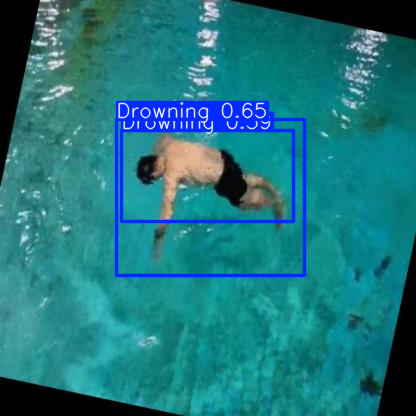

In [ ]:

from ultralytics import YOLO

# Load the trained model
model = YOLO("/content/drive/MyDrive/YOLOv8_Training/train3/weights/best.pt")  # Path to the best model

# Test on a new image
results = model.predict("/content/Swimming-and-Drowning-Detection-1/test/images/video_2022-12-07_23-08-17_mp4-9_jpg.rf.b512ca789f2423cb278df2675eb1001b.jpg")  # Replace with your image path
results[0].show()  # Display the result

In [ ]:
# Evaluate the model on the validation set
metrics = model.val()  # Evaluate on the validation set
print(metrics.box.map)  # mAP (mean Average Precision)

Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)


100%|██████████| 755k/755k [00:00<00:00, 9.70MB/s]
val: Scanning /content/Swimming-and-Drowning-Detection-1/valid/labels... 1478 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1478/1478 [00:00<00:00, 1783.82it/s]

val: New cache created: /content/Swimming-and-Drowning-Detection-1/valid/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [07:56<00:00,  5.13s/it]


                   all       1478       2748      0.826      0.799      0.847      0.508
              Drowning       1234       1577      0.835       0.81      0.893      0.545
   Person out of water         67         98      0.836      0.786      0.819      0.524
              Swimming        464       1073      0.808      0.801      0.828      0.455
Speed: 5.2ms preprocess, 309.1ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val
0.5081123415009835


In [1]:
!pip install flask

In [5]:
from flask import Flask, request, render_template, jsonify
from ultralytics import YOLO
import os

app = Flask(__name__)

# Load the trained model
model = YOLO("/content/drive/MyDrive/YOLOv8_Training/train3/weights/best.pt")

# Home page
@app.route('/')
def home():
    return render_template('index.html')  # Create an HTML file for the frontend

# Handle image upload and prediction
@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return jsonify({"error": "No file uploaded"}), 400

    file = request.files['file']
    if file.filename == '':
        return jsonify({"error": "No file selected"}), 400

    # Save the uploaded file
    file_path = os.path.join("uploads", file.filename)
    file.save(file_path)

    # Run prediction
    results = model.predict(file_path)
    results[0].save(filename="static/result.jpg")  # Save the result image

    # Check for drowning and send alert
    if "Drowning" in results[0].boxes.cls.tolist():
        send_alert("🚨 Drowning detected! Immediate action required!")

    # Return the result image path
    return jsonify({"result_image": "static/result.jpg"})

# Send alert (e.g., via Telegram)
def send_alert(message):
    bot_token = "YOUR_BOT_TOKEN"
    chat_id = "YOUR_CHAT_ID"
    url = f"https://api.telegram.org/bot{bot_token}/sendMessage"
    params = {
        "chat_id": chat_id,
        "text": message
    }
    requests

In [6]:
!pip install pyngrok

In [7]:
from pyngrok import ngrok
from flask import Flask

# Start ngrok tunnel
public_url = ngrok.connect(5000).public_url
print(f" * Running on {public_url}")

# Run the Flask app
!flask run --host=0.0.0.0 --port=5000

ERROR:pyngrok.process.ngrok:t=2025-03-19T09:25:08+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-03-19T09:25:08+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-03-19T09:25:08+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.